In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output
from testings import *
%matplotlib inline

# Curve Fitting
Curve fitting with python is a great way to test the agreement between experimental results and theoretical physics equations. We will go through the details of curve fitting in the form of three examples. 

## Linear Fit
In a mass-spring system, Hooke's law, $F = -kx$, tells us the force on the mass is proportional to its displacement from the equilibrium position at any given time. We will verify (or disapprove?) this with the results of an actual experiment. 

In [2]:
# Read dataset
exp1 = pd.read_csv("exp1.csv", names=["T(s)", "F(N)", "x(m)"], skiprows=1)
exp1 = exp1[(exp1["T(s)"] > 5.1) & (exp1["T(s)"] < 5.8)]
exp1

,T(s),F(N),x(m)
340,5.11,-0.859873,0.042259
341,5.12,-0.886156,0.043738
342,5.13,-0.900350,0.045282
343,5.14,-0.927661,0.046765
344,5.15,-0.945885,0.048378
...,...,...,...
404,5.75,-1.930137,0.128439
405,5.76,-1.948361,0.129649
406,5.77,-1.951774,0.130859
407,5.78,-1.966610,0.131891


In [3]:
# Extracting data
f1 = exp1["F(N)"]
x1 = exp1["x(m)"]

Now we fit the force and position data to a linear curve. 

In [4]:
def linear(x, k, f0):
    """
    A linear model. 
    Parameter:
    x: Displacement
    k: Proportionality constant
    f0: Y-axis intercept at x = 0
    Returns:
    F: The force linearly proportional to x
    """
    # Question 1
    return - k * x + f0

In [5]:
# Question 2
opt1, cov1 = opt.curve_fit(linear, x1, f1)

In [6]:
print(f"Parameters: {list(opt1)}")
print(f"Uncertainties: {list(np.diag(cov1))}")

Parameters: [12.285256426389335, -0.35059367238653116]
Uncertainties: [0.000503395924284698, 4.535312287306083e-06]


Run the next cell to plot the data. 

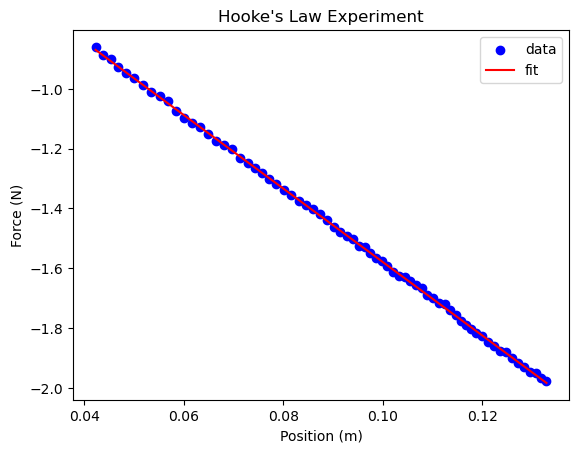

In [7]:
plt.scatter(x1, f1, color="blue", label="data")
plt.plot(x1, linear(x1, *opt1), color="red", label="fit")
plt.xlabel("Position (m)")
plt.ylabel("Force (N)")
plt.title("Hooke's Law Experiment")
plt.legend()
plt.show()

## Fitting to a sine curve
We are able to fit data points to any numerical function with Scipy. In the next section, we will try to fit the actual time evolution of a spring-mass system with a simple harmonic model. 

In [8]:
# Read dataset
exp2 = pd.read_csv("exp2.csv", names=["T(s)", "F(N)"], skiprows=1)
exp2 = exp2[(exp2["T(s)"] > 6) & (exp2["T(s)"] < 8)]
exp2[["T(s)"]] = exp2[["T(s)"]] - 6
exp2

,T(s),F(N)
353,0.01,0.942676
354,0.02,0.942676
355,0.03,0.942676
356,0.04,0.933577
357,0.05,0.933577
...,...,...
547,1.95,-0.858962
548,1.96,-0.858962
549,1.97,-0.886259
550,1.98,-0.886259


In [9]:
# Extracting data
f2 = exp2["F(N)"]
t2 = exp2["T(s)"]

The solution to the acceleration and the force of the sprng-mass system is a sinusoidal function, similar to the position but differ by a sign and a factor. 

In [10]:
def acceleration(t, A, w, phi):
    """
    The acceleration of a Simple Harmonic Oscillator. 
    Parameter:
    t: Time
    A: Amplitude
    w: Angular frequency
    phi: Constant phase difference
    Returns:
    a: The acceleration of the oscillator at time t. 
    """
    # Question 2
    return A * (w**2) * np.sin(w * t + phi)

In [11]:
# Question 2
opt2, cov2 = opt.curve_fit(acceleration, t2, f2, p0=[0.1, -10, 7.5])

In [12]:
print(f"Parameters: {list(opt2)}")
print(f"Uncertainties: {list(np.diag(cov2))}")

Parameters: [-0.014398932713645361, -7.995998975409129, 4.909053224345323]
Uncertainties: [1.06361852338731e-09, 1.2880204333181928e-05, 1.704707956975146e-05]


Run the next cell to plot the data. 

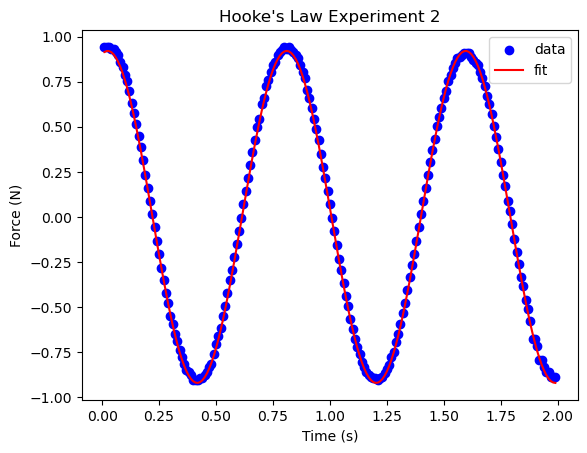

In [13]:
plt.scatter(t2, f2, color="blue", label="data")
plt.plot(t2, acceleration(t2, *opt2), color="red", label="fit")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Hooke's Law Experiment 2")
plt.legend()
plt.show()